# Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [1]:
import pandas as pd
import numpy as np

## Pandas Data Structures

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [2]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [3]:
counts.values

array([ 632, 1638,  569,  115])

In [4]:
counts.index

Int64Index([0, 1, 2, 3], dtype='int64')

We can assign meaningful labels to the index, if they are available:

In [5]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [6]:
bacteria['Actinobacteria']

569

In [7]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [8]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [9]:
bacteria[0]

632

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [10]:
np.log(bacteria)

Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
dtype: float64

We can also filter according to the values in the `Series`:

In [11]:
bacteria[bacteria>1000]

Proteobacteria    1638
dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [12]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [13]:
bacteria2 = pd.Series(bacteria_dict, index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria      NaN
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
dtype: float64

In [14]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [15]:
bacteria + bacteria2

Actinobacteria    1138
Bacteroidetes      NaN
Cyanobacteria      NaN
Firmicutes        1264
Proteobacteria    3276
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [16]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [17]:
data[['phylum','value','patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


A `DataFrame` has a second index, representing the columns:

In [18]:
data.columns

Index(['patient', 'phylum', 'value'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [19]:
data['value']

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [20]:
data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [21]:
type(data.value)

pandas.core.series.Series

In [22]:
type(data[['value']])

pandas.core.frame.DataFrame

Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). 

If we want access to a row in a `DataFrame`, we index its `ix` attribute.

In [23]:
data.ix[3]

patient                1
phylum     Bacteroidetes
value                115
Name: 3, dtype: object

Its important to note that the Series returned when a DataFrame is indexted is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [24]:
vals = data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [25]:
vals[5] = 0
vals

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

In [26]:
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


If we plan on modifying an extracted Series, its a good idea to make a copy.

In [27]:
vals = data.value.copy()
vals[5] = 1000
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


We can create or modify columns by assignment:

In [28]:
data.value[3] = 14
data

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [29]:
data['year'] = 2013
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


We can use `del` to remove columns, in the same way `dict` entries can be removed:

In [33]:
del data['year']
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [34]:
data.values

array([[1, 'Firmicutes', 632],
       [1, 'Proteobacteria', 1638],
       [1, 'Actinobacteria', 569],
       [1, 'Bacteroidetes', 14],
       [2, 'Firmicutes', 433],
       [2, 'Proteobacteria', 0],
       [2, 'Actinobacteria', 754],
       [2, 'Bacteroidetes', 555]], dtype=object)

Pandas uses a custom data structure to represent the indices of Series and DataFrames.

In [35]:
data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

Index objects are immutable:

In [36]:
data.index[0] = 15

TypeError: Index does not support mutable operations

This is so that Index objects can be shared between data structures without fear that they will be changed.

In [37]:
bacteria2.index = bacteria.index

In [38]:
bacteria2

Firmicutes         NaN
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

Let's start with some more bacteria data, stored in csv format.

In [39]:
!cat data/microbiome.csv

Taxon,Patient,Group,Tissue,Stool
Firmicutes,1,0,136,4182
Firmicutes,2,1,1174,703
Firmicutes,3,0,408,3946
Firmicutes,4,1,831,8605
Firmicutes,5,0,693,50
Firmicutes,6,1,718,717
Firmicutes,7,0,173,33
Firmicutes,8,1,228,80
Firmicutes,9,0,162,3196
Firmicutes,10,1,372,32
Firmicutes,11,0,4255,4361
Firmicutes,12,1,107,1667
Firmicutes,13,0,96,223
Firmicutes,14,1,281,2377
Proteobacteria,1,0,2469,1821
Proteobacteria,2,1,839,661
Proteobacteria,3,0,4414,18
Proteobacteria,4,1,12044,83
Proteobacteria,5,0,2310,12
Proteobacteria,6,1,3053,547
Proteobacteria,7,0,395,2174
Proteobacteria,8,1,2651,767
Proteobacteria,9,0,1195,76
Proteobacteria,10,1,6857,795
Proteobacteria,11,0,483,666
Proteobacteria,12,1,2950,3994
Proteobacteria,13,0,1541,816
Proteobacteria,14,1,1307,53
Actinobacteria,1,0,1590,4
Actinobacteria,2,1,25,2
Actinobacteria,3,0,259,300
Actinobacteria,4,1,568,7
Actinobacteria,5,0,1102,9
Actinobacteria,6,1,678,377
Actinobacteria,7,0,260,58
Actinobacteria,8,1,424,233
Actinobacteria,9,0,548,21
Actinobac

This table can be read into a DataFrame using `read_csv`:

In [40]:
mb = pd.read_csv("data/microbiome.csv")
mb

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605
4,Firmicutes,5,0,693,50
5,Firmicutes,6,1,718,717
6,Firmicutes,7,0,173,33
7,Firmicutes,8,1,228,80
8,Firmicutes,9,0,162,3196
9,Firmicutes,10,1,372,32


Notice that `read_csv` automatically considered the first row in the file to be a header row.

`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [42]:
mb = pd.read_table("data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [44]:
mb = pd.read_csv("data/microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

Group  Tissue  Stool
Taxon      Patient                      
Firmicutes 1            0     136   4182
           2            1    1174    703
           3            0     408   3946
           4            1     831   8605
           5            0     693     50

This is called a *hierarchical* index, which we will revisit later in the section.

If we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [46]:
pd.read_csv("data/microbiome.csv", nrows=4)

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605


Alternately, if we want to process our data in reasonable chunks, the `chunksize` argument will return an iterable object that can be employed in a data processing loop. For example, our microbiome data are organized by bacterial phylum, with 15 patients represented in each:

In [47]:
data_chunks = pd.read_csv("data/microbiome.csv", chunksize=15)

mean_tissue = {chunk.Taxon[0]: chunk.Tissue.mean() for chunk in data_chunks}
    
mean_tissue

{'Actinobacteria': 313.60000000000002,
 'Bacteroidetes': 632.20000000000005,
 'Firmicutes': 806.86666666666667,
 'Other': 211.30000000000001,
 'Proteobacteria': 2776.9333333333334}

Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [48]:
!cat data/microbiome_missing.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA
Firmicutes,10,162,3196
Firmicutes,11,372,-99999
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,?,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18
Proteobacteria,5,12044,83
Proteobacteria,6,2310,12
Proteobacteria,7,3053,547
Proteobacteria,8,395,2174
Proteobacteria,9,2651,767
Proteobacteria,10,1195,76
Proteobacteria,11,6857,795
Proteobacteria,12,483,666
Proteobacteria,13,2950,3994
Proteobacteria,14,1541,816
Proteobacteria,15,1307,53
Actinobacteria,1,569,648
Actinobacteria,2,1590,4
Actinobacteria,3,25,2
Actinobacteria,4,259,300
Actinobacteria,5,568,7
Actinobacteria,6,1102,9
Actinobacteria,7,678,377
Actinobacteria,8,260,58
Actinobacteria,9,424,233
Actinobacteria,10,548,21
Actinobacteria

In [61]:
pd.read_csv("data/microbiome_missing.csv").head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,NaN,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605
5,Firmicutes,6,693,50
6,Firmicutes,7,718,717
7,Firmicutes,8,173,33
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196


Above, Pandas recognized `NA` and an empty field as missing data.

In [49]:
pd.isnull(pd.read_csv("data/microbiome_missing.csv")).head(20)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [63]:
pd.read_csv("data/microbiome_missing.csv", na_values=['?', -99999]).head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,NaN,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605
5,Firmicutes,6,693,50
6,Firmicutes,7,718,717
7,Firmicutes,8,173,33
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196


These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

The `read_excel` function in Pandas imports individual sheets from Excel spreadhseets into a DataFrame:

In [51]:
mb1 = pd.read_excel('data/microbiome/MID2.xls', sheetname='Sheet 1', header=None)
mb1.head()

,0,1
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2


There are several other data formats that can be imported into Python and converted into DataFrames, with the help of buitl-in or third-party libraries. These include JSON, XML, HDF5, relational and non-relational databases, and various web APIs. These are beyond the scope of this tutorial, but are covered in [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

## Pandas Fundamentals

This section introduces the new user to the key functionality of Pandas that is required to use the software effectively.

For some variety, we will leave our digestive tract bacteria behind and employ some baseball data.

In [53]:
baseball = pd.read_csv("data/baseball.csv", index_col='id')
baseball.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2,1,1,4,4,0,0,3,0,0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0,0,0,0,2,0,0,0,0,0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0,0,0,0,4,0,0,0,0,0


### Manipulating indices

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows:

In [54]:
baseball.reindex(baseball.index[::-1]).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0,0,0,0,3,0,0,0,0,0
89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49,3,0,27,30,5,2,0,3,13
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25,6,1,37,74,3,6,4,1,11
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice that the `id` index is not sequential. Say we wanted to populate the table with every `id` value. We could specify and index that is a sequence from the first to the last `id` numbers in the database, and Pandas would fill in the missing data with `NaN` values:

In [55]:
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball.reindex(id_range).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2,1,1,4,4,0,0,3,0,0
88642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
88644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Missing values can be filled as desired, either with selected values, or by rule:

In [56]:
baseball.reindex(id_range, method='ffill', columns=['player','year']).head()

,player,year
id,,
88641,womacto01,2006
88642,womacto01,2006
88643,schilcu01,2006
88644,schilcu01,2006
88645,myersmi01,2006


In [57]:
baseball.reindex(id_range, fill_value='charliebrown', columns=['player']).head()

,player
id,
88641,womacto01
88642,charliebrown
88643,schilcu01
88644,charliebrown
88645,myersmi01


We can remove rows or columns via the `drop` method:

In [58]:
baseball.shape

(100, 22)

In [60]:
baseball.drop([89525, 89526]).head(10)

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2,1,1,4,4,0,0,3,0,0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0,0,0,0,2,0,0,0,0,0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0,0,0,0,4,0,0,0,0,0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40,7,0,46,55,2,2,3,4,6
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73,0,1,69,58,10,7,0,6,14
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0,0,0,1,7,0,0,6,0,1
89177,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8,0,0,4,10,1,0,0,1,1


In [61]:
baseball.drop(['ibb','hbp'], axis=1).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2,1,1,4,4,3,0,0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0,0,0,0,1,0,0,0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0,0,0,0,2,0,0,0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0,0,0,0,4,0,0,0


## Indexing and Selection

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [63]:
# Sample Series object
hits = baseball.h
hits

id
88641     14
88643      1
88645      0
88649      0
88650      1
88652    105
88653    159
88662      5
89177     10
89178     10
89330     80
89333      0
89334      6
89335      0
89336      0
89337     19
89338      0
89339      4
89340      4
89341      0
89343     13
89345      0
89347    126
89348      0
89352     40
89354      1
89355      0
89359      0
89360    119
89361    147
        ... 
89460      0
89462    146
89463    130
89464     55
89465      0
89466    129
89467     15
89468     51
89469     12
89473     80
89474     17
89480      0
89481     92
89482     54
89489    139
89493      0
89494      8
89495     57
89497      1
89498      0
89499     48
89501      8
89502     40
89521     94
89523    130
89525      0
89526      0
89530     82
89533    112
89534      3
Name: h, dtype: int64

In [64]:
# Numpy-style indexing
hits[:3]

id
88641    14
88643     1
88645     0
Name: h, dtype: int64

In [66]:
# Indexing by label
hits[[89523,89533]]

id
89523    130
89533    112
Name: h, dtype: int64

In a `DataFrame` we can slice along either or both axes:

In [68]:
baseball[['h','ab']].head()

,h,ab
id,,
88641,14,50
88643,1,2
88645,0,0
88649,0,3
88650,1,6


In [70]:
baseball[baseball.ab>500]

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73,0,1,69,58,10,7,0,6,14
89347,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51,14,6,44,48,6,1,14,3,14
89361,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95,0,0,81,94,3,7,0,5,14
89389,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63,2,2,9,96,1,1,1,2,16
89462,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93,6,1,85,99,14,1,0,9,14
89489,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87,4,0,52,118,8,11,0,6,12
89523,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50,4,3,23,112,0,3,7,5,5


For a more concise (and readable) syntax, we can use the new `query` method to perform selection on a `DataFrame`. Instead of having to type the fully-specified column, we can simply pass a string that describes what to select. The query above is then simply:

In [71]:
baseball.query('ab > 500')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73,0,1,69,58,10,7,0,6,14
89347,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51,14,6,44,48,6,1,14,3,14
89361,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95,0,0,81,94,3,7,0,5,14
89389,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63,2,2,9,96,1,1,1,2,16
89462,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93,6,1,85,99,14,1,0,9,14
89489,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87,4,0,52,118,8,11,0,6,12
89523,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50,4,3,23,112,0,3,7,5,5


The `DataFrame.index` and `DataFrame.columns` are placed in the query namespace by default. If you want to refer to a variable in the current namespace, you can prefix the variable with `@`:

In [72]:
min_ab = 450

In [73]:
baseball.query('ab > @min_ab')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73,0,1,69,58,10,7,0,6,14
89347,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51,14,6,44,48,6,1,14,3,14
89361,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95,0,0,81,94,3,7,0,5,14
89378,sheffga01,2007,1,DET,AL,133,494,107,131,20,...,75,22,5,84,71,2,9,0,6,10
89389,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63,2,2,9,96,1,1,1,2,16
89396,ramirma02,2007,1,BOS,AL,133,483,84,143,33,...,88,0,0,71,92,13,7,0,8,21
89439,kentje01,2007,1,LAN,NL,136,494,78,149,36,...,79,1,3,57,61,4,5,0,6,17
89462,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93,6,1,85,99,14,1,0,9,14
89466,gonzalu01,2007,1,LAN,NL,139,464,70,129,23,...,68,6,2,56,56,4,4,0,2,11


The indexing field `ix` allows us to select subsets of rows and columns in an intuitive way:

In [74]:
baseball.ix[89462, ['h','X2b', 'X3b', 'hr']]

h      146
X2b     24
X3b      1
hr      30
Name: 89462, dtype: object

In [77]:
baseball.ix[89462:89466, 5:8]

,g,ab,r
id,,,
89462,144,528,78
89463,130,446,62
89464,86,231,34
89465,44,0,0
89466,139,464,70


## Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as combining baseball statistics across years. First, let's (artificially) construct two Series, consisting of home runs hit in years 2006 and 2007, respectively:

In [78]:
hr2006 = baseball.ix[baseball.year==2006, 'hr']
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball.ix[baseball.year==2007, 'hr']
hr2007.index = baseball.player[baseball.year==2007]

Now, let's add them together, in hopes of getting 2-year home run totals:

In [79]:
hr_total = hr2006 + hr2007
hr_total

player
alomasa02   NaN
aloumo01    NaN
ausmubr01   NaN
benitar01   NaN
benitar01   NaN
biggicr01   NaN
bondsba01   NaN
cirilje01   NaN
cirilje01   NaN
claytro01   NaN
claytro01   NaN
clemero02   NaN
coninje01   NaN
coninje01   NaN
cormirh01   NaN
delgaca01   NaN
easleda01   NaN
edmonji01   NaN
embreal01   NaN
finlest01     7
floydcl01   NaN
francju01   NaN
francju01   NaN
glavito02   NaN
gomezch02   NaN
gomezch02   NaN
gonzalu01    30
gordoto01   NaN
graffto01   NaN
greensh01   NaN
             ..
sosasa01    NaN
sprinru01   NaN
stairma01   NaN
stantmi02   NaN
stinnke01   NaN
suppaje01   NaN
sweenma01   NaN
sweenma01   NaN
tavarju01   NaN
thomafr04   NaN
thomeji01   NaN
timlimi01   NaN
trachst01   NaN
trachst01   NaN
valenjo03   NaN
villoro01   NaN
vizquom01   NaN
wakefti01   NaN
walketo04   NaN
weathda01   NaN
wellsda01   NaN
wellsda01   NaN
whiteri01   NaN
whitero02   NaN
wickmbo01   NaN
wickmbo01   NaN
williwo02   NaN
witasja01   NaN
womacto01   NaN
zaungr01    NaN
Name: hr, dtype: 

Pandas' data alignment places `NaN` values for labels that do not overlap in the two Series. In fact, there are only 6 players that occur in both years.

In [80]:
hr_total[hr_total.notnull()]

player
finlest01     7
gonzalu01    30
johnsra05     0
myersmi01     0
schilcu01     0
seleaa01      0
Name: hr, dtype: float64

While we do want the operation to honor the data labels in this way, we probably do not want the missing values to be filled with `NaN`. We can use the `add` method to calculate player home run totals by using the `fill_value` argument to insert a zero for home runs where labels do not overlap:

In [81]:
hr2007.add(hr2006, fill_value=0)

player
alomasa02     0
aloumo01     13
ausmubr01     3
benitar01     0
benitar01     0
biggicr01    10
bondsba01    28
cirilje01     0
cirilje01     2
claytro01     0
claytro01     1
clemero02     0
coninje01     0
coninje01     6
cormirh01     0
delgaca01    24
easleda01    10
edmonji01    12
embreal01     0
finlest01     7
floydcl01     9
francju01     0
francju01     1
glavito02     0
gomezch02     0
gomezch02     1
gonzalu01    30
gordoto01     0
graffto01     9
greensh01    10
             ..
sosasa01     21
sprinru01     0
stairma01    21
stantmi02     0
stinnke01     1
suppaje01     0
sweenma01     0
sweenma01     2
tavarju01     0
thomafr04    26
thomeji01    35
timlimi01     0
trachst01     0
trachst01     0
valenjo03     3
villoro01     0
vizquom01     4
wakefti01     0
walketo04     0
weathda01     0
wellsda01     0
wellsda01     0
whiteri01     0
whitero02     4
wickmbo01     0
wickmbo01     0
williwo02     1
witasja01     0
womacto01     1
zaungr01     10
Name: hr, dtype: 

Operations can also be **broadcast** between rows or columns.

For example, if we subtract the maximum number of home runs hit from the `hr` column, we get how many fewer than the maximum were hit by each player:

In [82]:
baseball.hr - baseball.hr.max()

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
89177   -35
89178   -34
89330   -25
89333   -35
89334   -34
89335   -35
89336   -35
89337   -31
89338   -35
89339   -35
89340   -35
89341   -35
89343   -35
89345   -35
89347   -31
89348   -35
89352   -32
89354   -35
89355   -35
89359   -35
89360     0
89361    -9
         ..
89460   -35
89462    -5
89463   -25
89464   -26
89465   -35
89466   -20
89467   -35
89468   -34
89469   -35
89473   -26
89474   -34
89480   -35
89481   -23
89482   -25
89489   -11
89493   -35
89494   -35
89495   -29
89497   -35
89498   -35
89499   -34
89501   -35
89502   -33
89521    -7
89523   -25
89525   -35
89526   -35
89530   -32
89533   -22
89534   -35
Name: hr, dtype: int64

Or, looking at things row-wise, we can see how a particular player compares with the rest of the group with respect to important statistics

In [83]:
baseball.ix[89521, "player"]

'bondsba01'

In [84]:
stats = baseball[['h','X2b', 'X3b', 'hr']]
diff = stats - stats.ix[89521]
diff[:10]

,h,X2b,X3b,hr
id,,,,
88641,-80,-13,0,-27
88643,-93,-14,0,-28
88645,-94,-14,0,-28
88649,-94,-14,0,-28
88650,-93,-14,0,-28
88652,11,7,12,-22
88653,65,38,2,-13
88662,-89,-13,0,-28
89177,-84,-11,0,-28


We can also **apply** functions to each column or row of a `DataFrame`

In [85]:
stats.apply(np.median)

h      8
X2b    1
X3b    0
hr     0
dtype: float64

In [86]:
stat_range = lambda x: x.max() - x.min()
stats.apply(stat_range)

h      159
X2b     52
X3b     12
hr      35
dtype: int64

Lets use apply to calculate a meaningful baseball statistics, slugging percentage:

$$SLG = \frac{1B + (2 \times 2B) + (3 \times 3B) + (4 \times HR)}{AB}$$

And just for fun, we will format the resulting estimate.

In [87]:
def slugging(x): 
    bases = x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr']
    ab = x['ab']+1e-6
    
    return bases/ab

baseball.apply(slugging, axis=1).round(3)

id
88641    0.360
88643    0.500
88645    0.000
88649    0.000
88650    0.167
88652    0.394
88653    0.444
88662    0.231
89177    0.325
89178    0.260
89330    0.411
89333    0.000
89334    0.153
89335    0.000
89336    0.000
89337    0.321
89338    0.000
89339    0.333
89340    0.105
89341    0.000
89343    0.292
89345    0.000
89347    0.316
89348    0.000
89352    0.373
89354    0.143
89355    0.000
89359    0.000
89360    0.562
89361    0.480
         ...  
89460    0.000
89462    0.496
89463    0.430
89464    0.390
89465    0.000
89466    0.433
89467    0.321
89468    0.391
89469    0.232
89473    0.422
89474    0.245
89480    0.000
89481    0.403
89482    0.466
89489    0.448
89493    0.000
89494    0.244
89495    0.409
89497    0.500
89498    0.000
89499    0.344
89501    0.300
89502    0.386
89521    0.565
89523    0.381
89525    0.000
89526    0.000
89530    0.324
89533    0.524
89534    0.182
dtype: float64

### Exercise

Calculate **on base percentage** for each player, and assign it as a new column in the DataFrame.

$$OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$$

## Hierarchical indexing

If we wish to have a **unique** index for each row, we can create a **hierarchical index** from three fields.

In [90]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg    g   ab   r    h  X2b  X3b  hr  rbi  sb  cs  \
year team player                                                               
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1    2   1   1   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0    0   0   0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0    0   0   0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0    0   0   0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0    0   0   0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6   40   7   0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15   73   0   1   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0    0   0   0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0    8   0   0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1    8   2   1   

                     bb  so  ibb  hbp  sh  sf  gidp  
year team player                                     
2006 CHN  womacto01   4   4    0    0   3   0     0  
     BOS  schilcu01   0   1    0    0   0   0     0  
     NYA  myersmi01   0   0    0    0   0   0     0  
     MIL  helliri01   0   2    0    0   0   0     0  
     NYA  johnsra05   0   4    0    0   0   0     0  
     SFN  finlest01  46  55    2    2   3   4     6  
     ARI  gonzalu01  69  58   10    7   0   6    14  
     LAN  seleaa01    1   7    0    0   6   0     1  
2007 ATL  francju01   4  10    1    0   0   1     1  
     NYN  francju01  10  13    0    0   0   1     1

This index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.

In [91]:
baseball_h.index[:10]

MultiIndex(levels=[[2006, 2007], ['ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAA', 'LAN', 'MIL', 'MIN', 'NYA', 'NYN', 'OAK', 'PHI', 'SDN', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR'], ['alomasa02', 'aloumo01', 'ausmubr01', 'benitar01', 'biggicr01', 'bondsba01', 'cirilje01', 'claytro01', 'clemero02', 'coninje01', 'cormirh01', 'delgaca01', 'easleda01', 'edmonji01', 'embreal01', 'finlest01', 'floydcl01', 'francju01', 'glavito02', 'gomezch02', 'gonzalu01', 'gordoto01', 'graffto01', 'greensh01', 'griffke02', 'guarded01', 'helliri01', 'hernaro01', 'hoffmtr01', 'johnsra05', 'jonesto02', 'kentje01', 'kleskry01', 'loaizes01', 'loftoke01', 'mabryjo01', 'maddugr01', 'martipe02', 'mesajo01', 'moyerja01', 'mussimi01', 'myersmi01', 'oliveda02', 'parkch01', 'perezne01', 'piazzmi01', 'ramirma02', 'rodriiv01', 'rogerke01', 'sandere02', 'schilcu01', 'schmija01', 'seaneru01', 'seleaa01', 'sheffga01', 'smoltjo01', 'sosasa01', 'sprinru01', 'stairma01', 'stantmi02', '

In [92]:
baseball_h.index.is_unique

True

In [93]:
baseball_h.ix[(2007, 'ATL', 'francju01')]

stint     2
lg       NL
g        15
ab       40
r         1
h        10
X2b       3
X3b       0
hr        0
rbi       8
sb        0
cs        0
bb        4
so       10
ibb       1
hbp       0
sh        0
sf        1
gidp      1
Name: (2007, ATL, francju01), dtype: object

Recall earlier we imported some microbiome data using two index columns. This created a 2-level hierarchical index:

In [94]:
mb = pd.read_csv("data/microbiome.csv", index_col=['Taxon','Patient'])

In [95]:
mb.head(10)

Group  Tissue  Stool
Taxon      Patient                      
Firmicutes 1            0     136   4182
           2            1    1174    703
           3            0     408   3946
           4            1     831   8605
           5            0     693     50
           6            1     718    717
           7            0     173     33
           8            1     228     80
           9            0     162   3196
           10           1     372     32

In [96]:
mb.index

MultiIndex(levels=[['Actinobacteria', 'Bacteroidetes', 'Firmicutes', 'Other', 'Proteobacteria'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
           labels=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
           names=['Taxon', 'Patient'])

With a hierachical index, we can select subsets of the data based on a *partial* index:

In [97]:
mb.ix['Proteobacteria']

,Group,Tissue,Stool
Patient,,,
1,0,2469,1821
2,1,839,661
3,0,4414,18
4,1,12044,83
5,0,2310,12
6,1,3053,547
7,0,395,2174
8,1,2651,767
9,0,1195,76


Hierarchical indices can be created on either or both axes. Here is a trivial example:

In [98]:
frame = pd.DataFrame(np.arange(12).reshape(( 4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

Additionally, the order of the set of indices in a hierarchical `MultiIndex` can be changed by swapping them pairwise:

In [100]:
mb.swaplevel('Patient', 'Taxon').head()

,,Group,Tissue,Stool
Patient,Taxon,,,
1,Firmicutes,0,136,4182
2,Firmicutes,1,1174,703
3,Firmicutes,0,408,3946
4,Firmicutes,1,831,8605
5,Firmicutes,0,693,50


## Missing data

The occurence of missing data is so prevalent that it pays to use tools like Pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [101]:
foo = pd.Series([np.nan, -3, None, 'foobar'])
foo

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [102]:
foo.isnull()

0     True
1    False
2     True
3    False
dtype: bool

Missing values may be dropped or indexed out:

In [103]:
bacteria2

Firmicutes         NaN
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [104]:
bacteria2.dropna()

Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [105]:
bacteria2[bacteria2.notnull()]

Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

By default, `dropna` drops entire rows in which one or more values are missing.

In [106]:
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [107]:
data.dropna()

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

In [108]:
data.dropna(how='all')

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


This can be customized further by specifying how many values need to be present before a row is dropped via the `thresh` argument.

In [109]:
data.ix[7, 'year'] = np.nan
data

,patient,phylum,value,year
0,1,Firmicutes,632,NaN
1,1,Proteobacteria,1638,NaN
2,1,Actinobacteria,569,NaN
3,1,Bacteroidetes,14,NaN
4,2,Firmicutes,433,NaN
5,2,Proteobacteria,0,NaN
6,2,Actinobacteria,754,NaN
7,2,Bacteroidetes,555,NaN


In [110]:
data.dropna(thresh=4)

,patient,phylum,value,year


This is typically used in time series applications, where there are repeated measurements that are incomplete for some subjects.

If we want to drop missing values column-wise instead of row-wise, we use `axis=1`.

In [111]:
data.dropna(axis=1)

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in Pandas with the `fillna` argument.

In [112]:
bacteria2.fillna(0)

Firmicutes           0
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [113]:
data.fillna({'year': 2013, 'treatment':2})

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


Notice that `fillna` by default returns a new object with the desired filling behavior, rather than changing the `Series` or  `DataFrame` in place (**in general, we like to do this, by the way!**).

In [114]:
data

,patient,phylum,value,year
0,1,Firmicutes,632,NaN
1,1,Proteobacteria,1638,NaN
2,1,Actinobacteria,569,NaN
3,1,Bacteroidetes,14,NaN
4,2,Firmicutes,433,NaN
5,2,Proteobacteria,0,NaN
6,2,Actinobacteria,754,NaN
7,2,Bacteroidetes,555,NaN


We can alter values in-place using `inplace=True`.

In [115]:
data.year.fillna(2013, inplace=True)
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


Missing values can also be interpolated, using any one of a variety of methods:

In [116]:
bacteria2.fillna(method='bfill')

Firmicutes         632
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [117]:
bacteria2.fillna(bacteria2.mean())

Firmicutes         946.333333
Proteobacteria     632.000000
Actinobacteria    1638.000000
Bacteroidetes      569.000000
dtype: float64

## Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

In [118]:
baseball.sum()

player    womacto01schilcu01myersmi01helliri01johnsra05f...
year                                                 200692
stint                                                   113
team      CHNBOSNYAMILNYASFNARILANATLNYNTORTBAHOUARIATLM...
lg        NLALALNLALNLNLNLNLNLALALNLNLNLALNLNLNLNLALALNL...
g                                                      5238
ab                                                    13654
r                                                      1869
h                                                      3582
X2b                                                     739
X3b                                                      55
hr                                                      437
rbi                                                    1847
sb                                                      138
cs                                                       46
bb                                                     1549
so                                      

Clearly, `sum` is more meaningful for some columns than others. For methods like `mean` for which application to string variables is not just meaningless, but impossible, these columns are automatically exculded:

In [119]:
baseball.mean()

year     2006.92
stint       1.13
g          52.38
ab        136.54
r          18.69
h          35.82
X2b         7.39
X3b         0.55
hr          4.37
rbi        18.47
sb          1.38
cs          0.46
bb         15.49
so         24.08
ibb         1.77
hbp         1.12
sh          1.38
sf          1.20
gidp        3.54
dtype: float64

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

In [120]:
bacteria2

Firmicutes         NaN
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [121]:
bacteria2.mean()

946.33333333333337

Sometimes we may not want to ignore missing values, and allow the `nan` to propagate.

In [122]:
bacteria2.mean(skipna=False)

nan

Passing `axis=1` will summarize over rows instead of columns, which only makes sense in certain situations.

In [124]:
extra_bases = baseball[['X2b','X3b','hr']].sum(axis=1)
extra_bases.sort_values(ascending=False)

id
88653    69
89439    57
89361    56
89462    55
89396    54
89489    54
89360    54
89371    50
89378    46
89374    46
89389    45
89523    44
89521    42
89463    41
89466    40
88652    39
89438    36
89330    35
89533    33
89481    29
89430    26
89398    26
89347    25
89530    22
89473    20
89495    18
89464    17
89482    16
89499    15
89352    15
         ..
89498     0
89411     0
89525     0
89526     0
88650     0
88649     0
88645     0
88643     0
89341     0
89345     0
89381     0
89493     0
89450     0
89451     0
89372     0
89452     0
89370     0
89460     0
89367     0
89465     0
89384     0
89363     0
89445     0
89388     0
89359     0
89355     0
89354     0
89480     0
89348     0
89420     0
dtype: int64

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [125]:
baseball.describe()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,2006.92000,1.130000,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,0.27266,0.337998,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,2006.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2007.00000,1.000000,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2007.00000,1.000000,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,2007.00000,1.000000,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000
max,2007.00000,2.000000,155.000000,586.000000,107.00000,159.000000,52.000000,12.000000,35.000000,96.00000,22.000000,6.000000,132.000000,134.000000,43.000000,11.00000,14.000000,9.000000,21.000000


`describe` can detect non-numeric data and sometimes yield useful information about it.

In [126]:
baseball.player.describe()

count           100
unique           82
top       benitar01
freq              2
Name: player, dtype: object

We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [127]:
baseball.hr.cov(baseball.X2b)

69.076464646464629

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [128]:
baseball.hr.corr(baseball.X2b)

0.77906151825397507

In [129]:
baseball.ab.corr(baseball.h)

0.99421740362723776

In [130]:
baseball.corr()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
year,1.000000,0.004384,-0.050874,-0.001360,-0.023315,0.001151,-0.052917,-0.246099,0.060199,0.042812,0.030480,0.058296,0.005626,0.069610,0.015868,-0.000664,-0.012184,-0.007282,0.052131
stint,0.004384,1.000000,-0.257552,-0.216333,-0.209781,-0.206878,-0.196423,-0.085821,-0.209124,-0.205688,-0.120837,-0.055425,-0.190301,-0.214121,-0.118580,-0.195074,-0.091527,-0.155662,-0.224173
g,-0.050874,-0.257552,1.000000,0.935910,0.910262,0.929292,0.885847,0.518663,0.802014,0.891563,0.492362,0.520923,0.828572,0.866499,0.514423,0.730161,0.079361,0.767543,0.863041
ab,-0.001360,-0.216333,0.935910,1.000000,0.965609,0.994217,0.952249,0.535986,0.843308,0.947911,0.533536,0.577192,0.850803,0.923926,0.506398,0.767210,0.094537,0.840361,0.926632
r,-0.023315,-0.209781,0.910262,0.965609,1.000000,0.970560,0.923508,0.500807,0.890060,0.941483,0.596343,0.576454,0.915010,0.879375,0.588882,0.806523,-0.001273,0.839592,0.894724
h,0.001151,-0.206878,0.929292,0.994217,0.970560,1.000000,0.957275,0.514245,0.855163,0.952320,0.530018,0.571629,0.853384,0.906966,0.513009,0.767449,0.045533,0.839737,0.935525
X2b,-0.052917,-0.196423,0.885847,0.952249,0.923508,0.957275,1.000000,0.493267,0.779062,0.901751,0.413655,0.477487,0.780012,0.862149,0.453301,0.738226,0.005659,0.819361,0.906860
X3b,-0.246099,-0.085821,0.518663,0.535986,0.500807,0.514245,0.493267,1.000000,0.210028,0.369890,0.450421,0.384312,0.350682,0.408800,0.090993,0.217474,0.187012,0.394987,0.411577
hr,0.060199,-0.209124,0.802014,0.843308,0.890060,0.855163,0.779062,0.210028,1.000000,0.948787,0.364346,0.345187,0.916774,0.865929,0.673691,0.767411,-0.145374,0.782038,0.798350
rbi,0.042812,-0.205688,0.891563,0.947911,0.941483,0.952320,0.901751,0.369890,0.948787,1.000000,0.394633,0.435011,0.893945,0.929410,0.582982,0.780899,-0.054670,0.855260,0.906908


If we have a `DataFrame` with a hierarchical index (or indices), summary statistics can be applied with respect to any of the index levels:

In [131]:
mb.head()

Group  Tissue  Stool
Taxon      Patient                      
Firmicutes 1            0     136   4182
           2            1    1174    703
           3            0     408   3946
           4            1     831   8605
           5            0     693     50

In [132]:
mb.sum(level='Taxon')

,Group,Tissue,Stool
Taxon,,,
Actinobacteria,7,6167,1615
Bacteroidetes,7,8880,4276
Firmicutes,7,9634,30172
Other,7,2868,242
Proteobacteria,7,42508,12483


### Exercise: Compiling Ebola Data

The `data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

From these data files, use pandas to import them and create a single data frame that includes the daily totals of new cases and deaths for each country.

We may use this compiled data for more advaned applications later in the course.

In [ ]:
# Write your answer here

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [133]:
from datetime import datetime

In [134]:
now = datetime.now()
now

datetime.datetime(2015, 12, 14, 22, 9, 32, 387341)

In [135]:
now.day

14

In [136]:
now.weekday()

0

In addition to `datetime` there are simpler objects for date and time information only, respectively.

In [137]:
from datetime import date, time

In [138]:
time(3, 24)

datetime.time(3, 24)

In [139]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [140]:
my_age = now - datetime(1970, 9, 3)
my_age

datetime.timedelta(16538, 79772, 387341)

In [141]:
my_age.days/365.

45.30958904109589

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [143]:
segments = pd.read_csv("data/AIS/transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

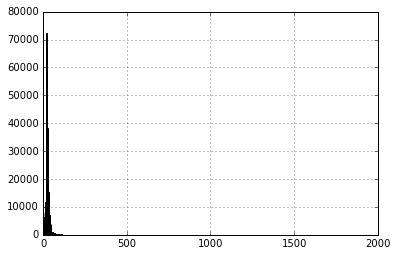

In [145]:
%matplotlib inline
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

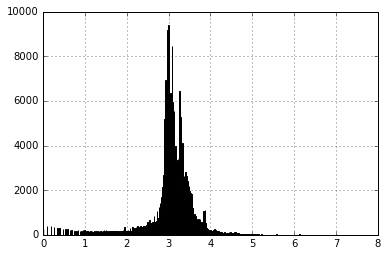

In [146]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

In [147]:
segments.st_time.dtype

dtype('O')

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [148]:
datetime.strptime(segments.st_time.ix[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [150]:
parse(segments.st_time.ix[0])

datetime.datetime(2009, 2, 10, 16, 3)

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire Series of formatted strings into `datetime` objects.

In [152]:
pd.to_datetime(segments.st_time[:10])

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [153]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

## Merging and joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [154]:
vessels = pd.read_csv("data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155,2,Tanker/Unknown


In [155]:
[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [156]:
vessels.type.value_counts()

Cargo                                                                                                   5622
Tanker                                                                                                  2440
Pleasure                                                                                                 601
Tug                                                                                                      221
Sailing                                                                                                  205
Fishing                                                                                                  200
Other                                                                                                    178
Passenger                                                                                                150
Towing                                                                                                   117
Unknown            

The challenge, however, is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. The table of vessel information has a *one-to-many* relationship with the segments.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [157]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df1

,age,id
0,22,0
1,24,1
2,28,2
3,24,3


In [158]:
df2

,id,score
0,0,0.518379
1,1,0.882917
2,2,0.180636
3,0,0.353103
4,1,0.969890
5,2,0.147174


In [159]:
pd.merge(df1, df2)

,age,id,score
0,22,0,0.518379
1,22,0,0.353103
2,24,1,0.882917
3,24,1,0.969890
4,28,2,0.180636
5,28,2,0.147174


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [160]:
pd.merge(df1, df2, how='outer')

,age,id,score
0,22,0,0.518379
1,22,0,0.353103
2,24,1,0.882917
3,24,1,0.969890
4,28,2,0.180636
5,28,2,0.147174
6,24,3,NaN


The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge:

In [161]:
segments.head(1)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27


In [162]:
vessels.head(1)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing


we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [163]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [164]:
segments_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` *method* for either of the tables:

In [165]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [166]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_x,...,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type_y
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27,foo
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20,foo
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55,foo
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34,foo
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35,foo


This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset in from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [167]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None)
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing multiple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [168]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        32
1    patient        1
     obs            2
     week           2
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        30
2    patient        1
     obs            3
     week           4
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        24
3    patient        1
     obs            4
     week           8
                ...  
627  age           57
     sex            M
     twstrs        38
628  patient      109
     obs            4
     week           8
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        33
629  patient      109
     obs            5
     week 

To complement this, `unstack` pivots from rows back to columns.

In [169]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

In [170]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [171]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [172]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32,30,24,37,39,36
2,60,26,27,41,65,67
3,44,20,23,26,35,35
4,53,61,64,62,NaN,NaN
5,53,35,48,49,41,51


In [173]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner')
                  .head())
cdystonia_wide

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32,30,24,37,39,36
6,2,1,2,10000U,70,F,60,26,27,41,65,67
12,3,1,3,5000U,64,F,44,20,23,26,35,35
18,4,1,4,Placebo,59,F,53,61,64,62,NaN,NaN
22,5,1,5,10000U,76,F,53,35,48,49,41,51


A slightly cleaner way of doing this is to set the patient-level information as an index before unstacking:

In [174]:
(cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs']
     .unstack('week').head())

,,,,,week,0,2,4,8,12,16
patient,site,id,treat,age,sex,,,,,,
1,1,1,5000U,65,F,32,30,24,37,39,36
2,1,2,10000U,70,F,60,26,27,41,65,67
3,1,3,5000U,64,F,44,20,23,26,35,35
4,1,4,Placebo,59,F,53,61,64,62,NaN,NaN
5,1,5,10000U,76,F,53,35,48,49,41,51


To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized. This function is useful for `DataFrame`s where one
or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). The measured variables are "unpivoted" to
the row axis, leaving just two non-identifier columns, a *variable* and its corresponding *value*, which can both be renamed using optional arguments.

In [175]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

,patient,site,id,treat,age,sex,obs,twsters
0,1,1,1,5000U,65,F,1,32
1,2,1,2,10000U,70,F,1,60
2,3,1,3,5000U,64,F,1,44
3,4,1,4,Placebo,59,F,1,53
4,5,1,5,10000U,76,F,1,53


This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [176]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32,30,24,37,39,36
2,60,26,27,41,65,67
3,44,20,23,26,35,35
4,53,61,64,62,NaN,NaN
5,53,35,48,49,41,51


If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [177]:
cdystonia.pivot('patient', 'obs')

week                     site             ...  sex                 \
obs        1   2   3   4   5   6    1   2   3   4 ...    3    4    5    6   
patient                                           ...                       
1          0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
2          0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
3          0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
4          0   2   4   8 NaN NaN    1   1   1   1 ...    F    F  NaN  NaN   
5          0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
6          0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
7          0   2   4   8  12  16    1   1   1   1 ...    M    M    M    M   
8          0   2   4   8  12  16    1   1   1   1 ...    M    M    M    M   
9          0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
10         0   2   4   8  12  16    1   1   1   1 ...    M    M    M    M   
11         0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
12         0   2   4   8  12  16    1   1   1   1 ...    F    F    F    F   
13         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
14         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
15         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
16         0   2   4   8  12  16    2   2   2   2 ...    M    M    M    M   
17         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
18         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
19         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
20         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
21         0   2   4   8  12  16    2   2   2   2 ...    F    F    F    F   
22         0   2   4   8  12  16    2   2   2   2 ...    M    M    M    M   
23         0   2   4 NaN  12  16    2   2   2 NaN ...    F  NaN    F    F   
24         0   2   4   8  12  16    2   2   2   2 ...    M    M    M    M   
25         0   2   4   8  12  16    2   2   2   2 ...    M    M    M    M   
26         0 NaN   4   8  12  16    2 NaN   2   2 ...    M    M    M    M   
27         0   2   4   8  12  16    3   3   3   3 ...    F    F    F    F   
28         0   2   4   8  12  16    3   3   3   3 ...    F    F    F    F   
29         0   2   4   8  12  16    3   3   3   3 ...    M    M    M    M   
30         0   2   4   8  12  16    3   3   3   3 ...    F    F    F    F   
...      ...  ..  ..  ..  ..  ..  ...  ..  ..  .. ...  ...  ...  ...  ...   
80         0   2   4   8  12  16    8   8   8   8 ...    F    F    F    F   
81         0   2   4   8  12  16    8   8   8   8 ...    M    M    M    M   
82         0   2   4   8  12  16    8   8   8   8 ...    M    M    M    M   
83         0   2   4   8  12  16    8   8   8   8 ...    F    F    F    F   
84         0   2   4   8  12  16    8   8   8   8 ...    M    M    M    M   
85         0 NaN NaN NaN NaN NaN    8 NaN NaN NaN ...  NaN  NaN  NaN  NaN   
86         0   2   4   8  12  16    8   8   8   8 ...    F    F    F    F   
87         0   2   4   8  12  16    8   8   8   8 ...    M    M    M    M   
88         0   2   4   8  12  16    8   8   8   8 ...    M    M    M    M   
89         0   2   4   8  12  16    8   8   8   8 ...    F    F    F    F   
90         0   2   4   8  12  16    8   8   8   8 ...    F    F    F    F   
91         0   2   4   8  12  16    8   8   8   8 ...    M    M    M    M   
92         0   2   4   8  12  16    8   8   8   8 ...    M    M    M    M   
93         0 NaN   4   8  12  16    8 NaN   8   8 ...    M    M    M    M   
94         0   2   4   8 NaN  16    8   8   8   8 ...    M    M  NaN    M   
95         0   2   4   8  12  16    8   8   8   8 ...    F    F    F    F   
96         0   2   4   8  12  16    8   8   8   8 ...    F    F    F    F   
97         0 NaN   4   8  12  16    8 NaN   8   8 ...    M    M    M    M   
98  

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [178]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', 
                      aggfunc=max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [179]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" which include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [180]:
vessels.duplicated(subset='names')

mmsi
1            False
9            False
21           False
74           False
103          False
310          False
3011         False
4731         False
15151        False
46809        False
80404        False
82003        False
298716       False
366235       False
439541       False
453556       False
505843       False
527918       False
565026       False
572329       False
587370       False
641114       False
642262       False
693559       False
883085        True
1193046      False
1193946      False
1233916      False
1239468      False
3041300      False
             ...  
720728000     True
720754000    False
720768000    False
725004700    False
725005560    False
725005570    False
725011300     True
725018300    False
725019006     True
725021000    False
725022000    False
730000161    False
730010001    False
730026000    False
730031000    False
735057548    False
735059037    False
760101000    False
770576100    False
812719000    False
857632392    False
8669468

In [181]:
vessels.drop_duplicates(['names'])

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155,2,Tanker/Unknown
310,1,Arabella,N,Bermuda,Foreign,1,47.0,47,1,Unknown
3011,1,Charleston,N,Anguilla,Foreign,1,160.0,160,1,Other
4731,1,000004731,N,Yemen (Republic of),Foreign,1,30.0,30,1,Unknown
15151,2,R L Enterkin/Us Vessel,N,Unknown,Unknown,2,60.0/175.0,175,1,Tug


### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [182]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [183]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [184]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0      1
1      1
2      1
3      1
4      1
5      1
6      2
7      2
8      2
9      2
10     2
11     2
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     0
21     0
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
      ..
601    2
602    2
603    2
604    0
605    0
606    0
607    0
608    0
609    0
610    1
611    1
612    1
613    1
614    1
615    1
616    2
617    2
618    2
619    2
620    2
621    2
622    2
623    2
624    2
625    2
626    1
627    1
628    1
629    1
630    1
Name: treatment, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [185]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0             0
1             1
2          1024
3         59049
4       1048576
5       9765625
6      60466176
7     282475249
8    1073741824
9    3486784401
dtype: float64

In [186]:
np.log(vals)

0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [187]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [188]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
2        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
3        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
4        1      0
         2      0
         3      0
         4      0
5        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
6        1      2
         2      2
               ..
104      3      2
         5      2
         6      2
105      1      0
         2      0
         3      0
         4      0
         5      0
         6      0
106      1      1
         2      1
         3      1
         4      1
         5      1
         6      1
107      1      2
         3      2
         4      2
         6      2
108      1      2
         2      2
         3      2
         4      2
         5     

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

Let's consider the DataFrame containing the ships corresponding to the transit segments on the eastern seaboard. The `type` variable denotes the class of vessel; we can create a matrix of indicators for this. For simplicity, lets filter out the 5 most common types of ships:


In [189]:
top5 = vessels.type.isin(vessels.type.value_counts().index[:5])
top5.head(10)

mmsi
1        False
9        False
21       False
74       False
103      False
310      False
3011     False
4731     False
15151     True
46809    False
Name: type, dtype: bool

In [190]:
vessels5 = vessels[top5]

In [191]:
pd.get_dummies(vessels5.type).head(10)

,Cargo,Pleasure,Sailing,Tanker,Tug
mmsi,,,,,
15151,0,0,0,0,1
80404,0,1,0,0,0
366235,1,0,0,0,0
587370,0,0,0,0,1
693559,0,0,0,0,1
1233916,0,1,0,0,0
3041300,1,0,0,0,0
3663760,1,0,0,0,0
3688360,1,0,0,0,0


### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [192]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 80's:

In [193]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
5     (60, 70]
6     (60, 70]
7     (60, 70]
8     (60, 70]
9     (60, 70]
10    (60, 70]
11    (60, 70]
12    (60, 70]
13    (60, 70]
14    (60, 70]
15    (60, 70]
16    (60, 70]
17    (60, 70]
18    (50, 60]
19    (50, 60]
20    (50, 60]
21    (50, 60]
22    (70, 80]
23    (70, 80]
24    (70, 80]
25    (70, 80]
26    (70, 80]
27    (70, 80]
28    (50, 60]
29    (50, 60]
Name: age, dtype: category
Categories (7, object): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [194]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
12    [60, 70)
13    [60, 70)
14    [60, 70)
15    [60, 70)
16    [60, 70)
17    [60, 70)
18    [50, 60)
19    [50, 60)
20    [50, 60)
21    [50, 60)
22    [70, 80)
23    [70, 80)
24    [70, 80)
25    [70, 80)
26    [70, 80)
27    [70, 80)
28    [50, 60)
29    [50, 60)
Name: age, dtype: category
Categories (7, object): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [195]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:30]

0             old
1             old
2             old
3             old
4             old
5             old
6             old
7             old
8             old
9             old
10            old
11            old
12            old
13            old
14            old
15            old
16            old
17            old
18    middle-aged
19    middle-aged
20    middle-aged
21    middle-aged
22            old
23            old
24            old
25            old
26            old
27            old
28    middle-aged
29    middle-aged
Name: age, dtype: category
Categories (4, object): [young < middle-aged < old < really old]

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [196]:
pd.qcut(cdystonia.age, 4)[:30]

0     (56, 65]
1     (56, 65]
2     (56, 65]
3     (56, 65]
4     (56, 65]
5     (56, 65]
6     (65, 83]
7     (65, 83]
8     (65, 83]
9     (65, 83]
10    (65, 83]
11    (65, 83]
12    (56, 65]
13    (56, 65]
14    (56, 65]
15    (56, 65]
16    (56, 65]
17    (56, 65]
18    (56, 65]
19    (56, 65]
20    (56, 65]
21    (56, 65]
22    (65, 83]
23    (65, 83]
24    (65, 83]
25    (65, 83]
26    (65, 83]
27    (65, 83]
28    (56, 65]
29    (56, 65]
Name: age, dtype: category
Categories (4, object): [[26, 46] < (46, 56] < (56, 65] < (65, 83]]

Alternatively, one can specify custom quantiles to act as cut points:

In [197]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

0       (1.8, 7.8]
1      (7.8, 45.4]
2       (1.8, 7.8]
3      (7.8, 45.4]
4      (7.8, 45.4]
5      (7.8, 45.4]
6     (45.4, 89.7]
7      (7.8, 45.4]
8      (7.8, 45.4]
9      (7.8, 45.4]
10      (1.8, 7.8]
11     (7.8, 45.4]
12     (7.8, 45.4]
13     (7.8, 45.4]
14     (7.8, 45.4]
15    (45.4, 89.7]
16    (45.4, 89.7]
17     (7.8, 45.4]
18     (7.8, 45.4]
19     (7.8, 45.4]
20      (1.8, 7.8]
21      (1.8, 7.8]
22     (7.8, 45.4]
23     (7.8, 45.4]
24     (7.8, 45.4]
25     (7.8, 45.4]
26     (7.8, 45.4]
27     (7.8, 45.4]
28     (7.8, 45.4]
29     (7.8, 45.4]
Name: seg_length, dtype: category
Categories (5, object): [[1, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] < (89.7, 1882]]

Note that you can easily combine discretiztion with the generation of indicator variables shown above:

In [198]:
pd.get_dummies(quantiles).head(10)

,"[1, 1.8]","(1.8, 7.8]","(7.8, 45.4]","(45.4, 89.7]","(89.7, 1882]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [199]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [200]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [201]:
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)

patient 1
group    patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1
patient 2
group     patient  obs  week  site  id   treat  age sex  twstrs  treatment
6         2    1     0     1   2  10000U   70   F      60          2
7         2    2     2     1   2  10000U   70   F      26          2
8         2    3     4     1   2  10000U   70   F      27          2
9         2    4     8     1   2  10000U   70   F      41          2
10        2    5    12     1   2  10000U   70   F      65          2
11        2    6    16     1   2  10000U   70   F      67          2
patient 3
group 

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [202]:
cdystonia_grouped.agg(np.mean).head()

,patient,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,,
1,1,3.5,7.0,1,1,65,33.000000,1
2,2,3.5,7.0,1,2,70,47.666667,2
3,3,3.5,7.0,1,3,64,30.500000,1
4,4,2.5,3.5,1,4,59,60.000000,0
5,5,3.5,7.0,1,5,76,46.166667,2


Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

In [203]:
cdystonia_grouped.mean().head()

,patient,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,,
1,1,3.5,7.0,1,1,65,33.000000,1
2,2,3.5,7.0,1,2,70,47.666667,2
3,3,3.5,7.0,1,3,64,30.500000,1
4,4,2.5,3.5,1,4,59,60.000000,0
5,5,3.5,7.0,1,5,76,46.166667,2


The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [204]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean,treatment_mean
patient,,,,,,,,
1,1,3.5,7.0,1,1,65,33.000000,1
2,2,3.5,7.0,1,2,70,47.666667,2
3,3,3.5,7.0,1,3,64,30.500000,1
4,4,2.5,3.5,1,4,59,60.000000,0
5,5,3.5,7.0,1,5,76,46.166667,2


In [205]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
6      48.0
7      42.0
8      32.5
9      35.5
10     20.5
11     44.5
12     26.0
13     45.5
14     47.5
15     51.5
16     56.5
17     63.0
18     53.5
19     42.0
20     53.5
21     64.0
22     41.0
23     58.0
24     52.5
25     31.0
26     47.0
27     49.5
28     24.5
29     38.0
30     32.0
       ... 
80     25.0
81     44.0
82     29.0
83     19.5
84     32.5
85     37.0
86     24.5
87     38.5
88     25.5
89     44.5
90     49.0
91     53.0
92     26.5
93     34.0
94     37.0
95     16.0
96     35.0
97     46.0
98     33.5
99     29.0
100    61.0
101    32.5
102    51.5
103    45.0
104    46.0
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [206]:
cdystonia.groupby(['week','site']).mean().head()

patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5    1  6.5  59.000000  43.083333   1.000000
     2        19.5    1  7.5  53.928571  51.857143   0.928571
     3        32.5    1  6.5  51.500000  38.750000   1.000000
     4        42.5    1  4.5  59.250000  48.125000   1.000000
     5        49.5    1  3.5  51.833333  49.333333   1.000000

Alternately, we can **transform** the data, using a function of our choice with the `transform` method:

In [207]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

,patient,obs,week,site,id,age,twstrs,treatment
0,NaN,-1.336306,-1.135550,NaN,NaN,NaN,-0.181369,NaN
1,NaN,-0.801784,-0.811107,NaN,NaN,NaN,-0.544107,NaN
2,NaN,-0.267261,-0.486664,NaN,NaN,NaN,-1.632322,NaN
3,NaN,0.267261,0.162221,NaN,NaN,NaN,0.725476,NaN
4,NaN,0.801784,0.811107,NaN,NaN,NaN,1.088214,NaN


It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns:

In [208]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [209]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

,twstrs
patient,
1,33.000000
2,47.666667
3,30.500000
4,60.000000
5,46.166667


If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [210]:
chunks = dict(list(cdystonia_grouped))

In [211]:
chunks[4]

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment
18,4,1,0,1,4,Placebo,59,F,53,0
19,4,2,2,1,4,Placebo,59,F,61,0
20,4,3,4,1,4,Placebo,59,F,64,0
21,4,4,8,1,4,Placebo,59,F,62,0


By default, `groupby` groups by row, but we can specify the `axis` argument to change this. For example, we can group our columns by `dtype` this way:

In [212]:
dict(list(cdystonia.groupby(cdystonia.dtypes, axis=1)))

{dtype('int64'):      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1     0     1   1   65      32          1
 1          1    2     2     1   1   65      30          1
 2          1    3     4     1   1   65      24          1
 3          1    4     8     1   1   65      37          1
 4          1    5    12     1   1   65      39          1
 5          1    6    16     1   1   65      36          1
 6          2    1     0     1   2   70      60          2
 7          2    2     2     1   2   70      26          2
 8          2    3     4     1   2   70      27          2
 9          2    4     8     1   2   70      41          2
 10         2    5    12     1   2   70      65          2
 11         2    6    16     1   2   70      67          2
 12         3    1     0     1   3   64      44          1
 13         3    2     2     1   3   64      20          1
 14         3    3     4     1   3   64      23          1
 15         3    4     8     1   3   64 

Its also possible to group by one or more levels of a hierarchical index. Recall `cdystonia2`, which we created with a hierarchical index:

In [213]:
cdystonia2.head(10)

week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [214]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [215]:
def top(df, column, n=5):
    return df.sort_index(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [216]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments.head(15)

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

## Exercise

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [116]:
from IPython.core.display import HTML
HTML(filename='data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


Women and children first?

1. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
2. Calculate the same proportion, but by class and sex.
3. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

# Plotting with Pandas

matplotlib is a relatively *low-level* plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

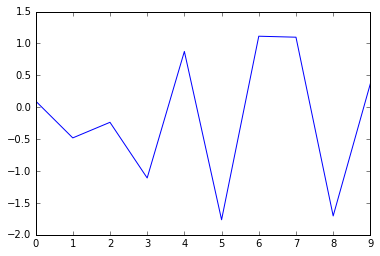

In [219]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

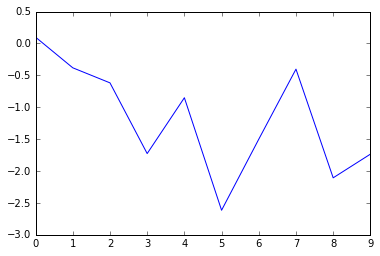

In [220]:
normals.cumsum().plot(grid=False)

Similarly, for a DataFrame:

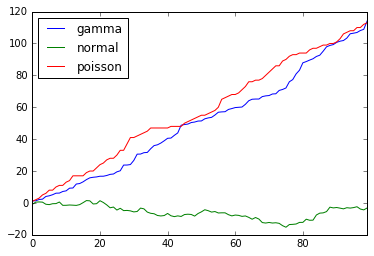

In [221]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12217f0b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120c4e668>], dtype=object)

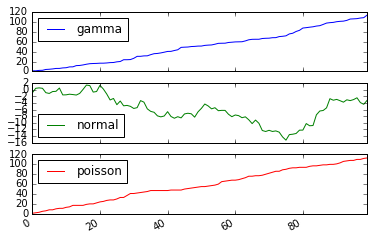

In [222]:
variables.cumsum(0).plot(subplots=True, grid=False)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

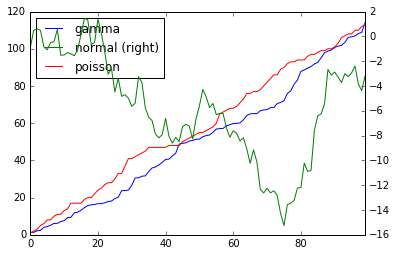

In [223]:
variables.cumsum(0).plot(secondary_y='normal', grid=False)

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

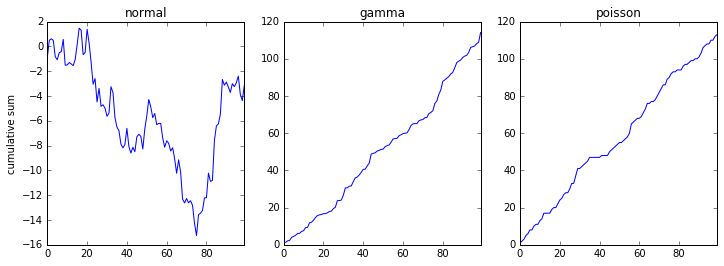

In [225]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [227]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


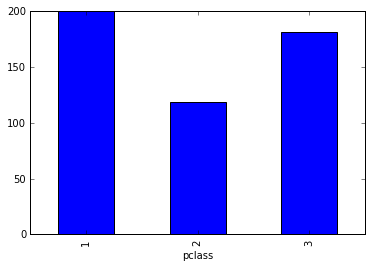

In [228]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

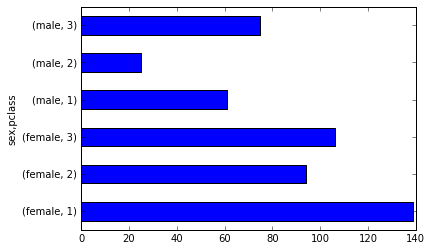

In [229]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')

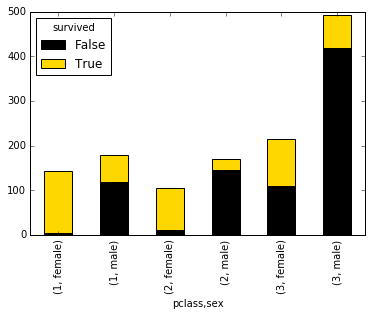

In [230]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.

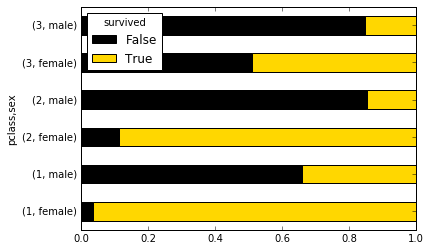

In [231]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

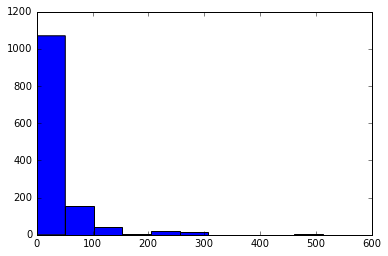

In [232]:
titanic.fare.hist(grid=False)

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

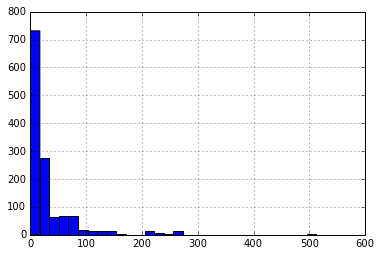

In [233]:
titanic.fare.hist(bins=30)

There are algorithms for determining an "optimal" number of bins, each of which varies somehow with the number of observations in the data series.

In [234]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

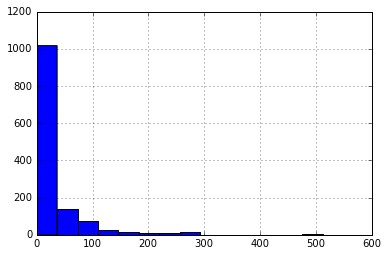

In [235]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

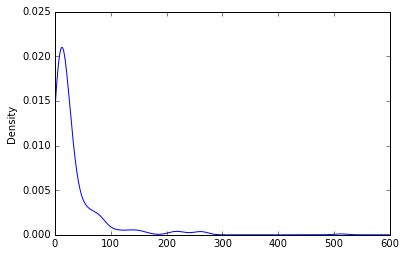

In [236]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

Often, histograms and density plots are shown together:

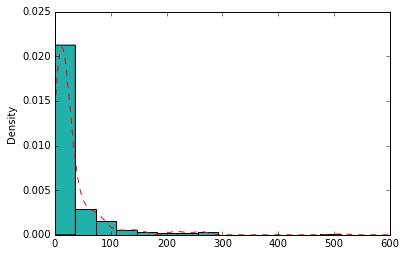

In [237]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

We will explore kernel density estimates more in the next section.

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

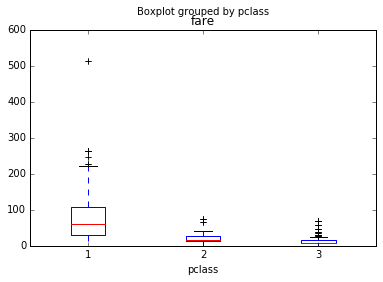

In [238]:
titanic.boxplot(column='fare', by='pclass', grid=False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

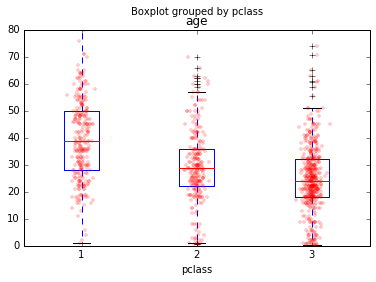

In [239]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

### Exercise

Using the Titanic data, create kernel density estimate plots of the age distributions of survivors and victims.

## Scatterplots

To look at how Pandas does scatterplots, let's reload the baseball sample dataset.

In [240]:
baseball = pd.read_csv("data/baseball.csv")
baseball.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2,1,1,4,4,0,0,3,0,0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0,0,0,0,1,0,0,0,0,0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0,0,0,0,2,0,0,0,0,0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0,0,0,0,4,0,0,0,0,0


Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function `scatter`.

(0, 200)

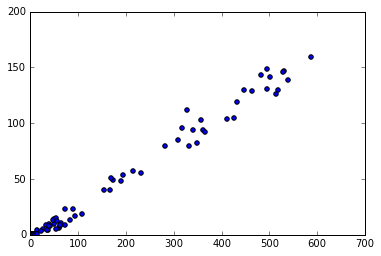

In [241]:
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0, 700); plt.ylim(0, 200)

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

(0, 200)

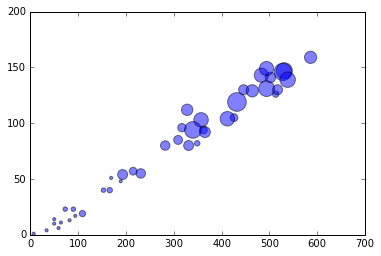

In [242]:
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)

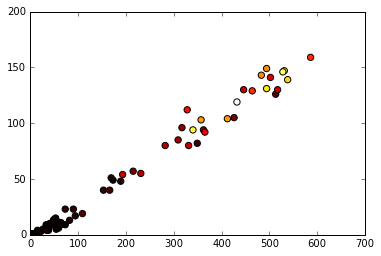

In [243]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200);

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optiorally with histograms or kernel density estimates on the diagonal.

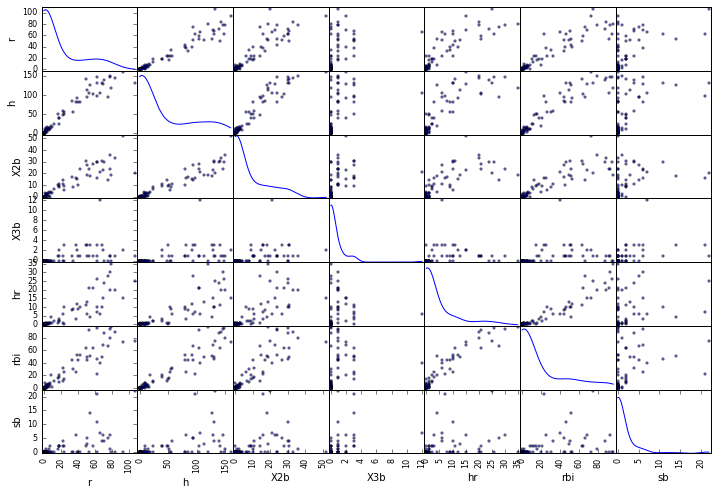

In [244]:
_ = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8), diagonal='kde')